# Lab2: Data analysis

Throughout all the following labs, we will work on the following problem: 

**could AI have predicted who died and who survived the Titanic disaster ?**

We will begin by analyzing it using `pandas` and plot the data using `matplotlib` and `seaborn`.

In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Load dataset
The dataset is available in its `csv` format.

In [3]:
df = pd.read_csv("../titanic.csv")
df.shape

(891, 12)

## Identify rows and columns
1. Find the number of rows and the number of columns

In [4]:
print("Number of rows : "+str(len(df)))  #df.shape[0]
print("Number of columns : " + str(len(df.columns))) #df.shape[1]

Number of rows : 891
Number of columns : 12


2. List every column name and give a brief description of the data

In [5]:
for i in range(len(df.columns)):
    description = ""
    if i == 0:
        description = "the passenger id"
    elif i==1:
        description = "1 if the passenger survived Titanic and 0 if not"
    elif i==2:
        description = "the passanger's class"
    elif i==3:
        description = "the passanger's name"
    elif i==4:
        description = "male or female"
    elif i==5:
        description = "the passanger's age"
    print(str(i)+"."+df.columns[i]+" : "+description)

0.PassengerId : the passenger id
1.Survived : 1 if the passenger survived Titanic and 0 if not
2.Pclass : the passanger's class
3.Name : the passanger's name
4.Sex : male or female
5.Age : the passanger's age
6.SibSp : 
7.Parch : 
8.Ticket : 
9.Fare : 
10.Cabin : 
11.Embarked : 


In [6]:
print(df.iloc[0].Survived) #the value of survived for passanger 0+1

0


In [7]:
print(df["PassengerId"]) #selecting a column

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64


3. Specify for each column the data type and create a list `quantitative_vars` that will contain the names of the quantitative variables and `qualitative_vars` that will contain the names of the qualitative variables.

(MyNote) Pandas' DataFrame documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [8]:
data_types = df.dtypes
print(data_types)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [25]:
quantitative_vars = ["Age","Fare","SibSp","Parch"]
qualitative_vars = [x for x in df.columns if x not in qualitative_vars]
print(quantitative_vars)
print(qualitative_vars)

['Age', 'Fare', 'SibSp', 'Parch']
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked']


4. What column are we trying to predict ? Store it into a list `target`.

In [26]:
target = df["Survived"]
print(target)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


5. Infer what columns will be used for prediction and what column you can omit immediately. Create the corresponding list `features` and update `quantitative_vars` and `qualitative_vars`.

In [27]:
drop_cols = ["PassengerId","Name"]
def remove_if_not_in(array,variables_to_remove):
    for val in array:
        if val in variables_to_remove:
            array.remove(val)
    return array
print(remove_if_not_in(qualitative_vars,drop_cols))
print(remove_if_not_in(quantitative_vars,drop_cols))

['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked']
['Age', 'Fare', 'SibSp', 'Parch']


6. Give the repartition of the target to predict using the `value_counts` method. How many people died in the Titanic disaster ? How many survived ?

In [28]:
print(target.value_counts())

0    549
1    342
Name: Survived, dtype: int64


## Univariate analysis

1. For each **quantitative variables** (that you should have stored in the variable `quantitative_vars`), give the main statistical estimators: mean, median, standard error.



In [36]:
print(df[quantitative_vars].describe())

              Age        Fare       SibSp       Parch
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.523008    0.381594
std     14.526497   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000




2. For each **quantitative variables** (that you should have stored in the variable `quantitative_vars`), plot the variable repartitions using `sns.histplot` and `sns.violinplot`. Deduce for each variable a possible distribution.



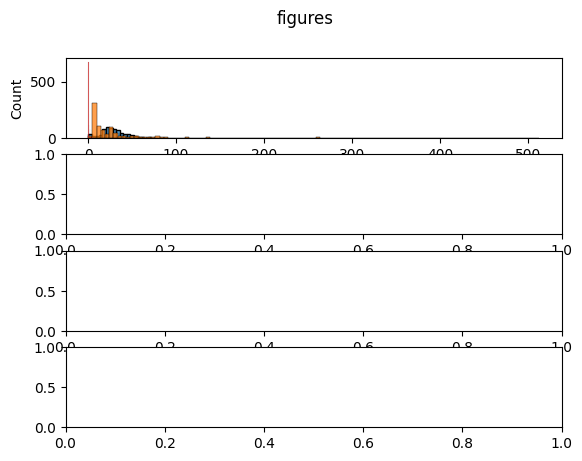

In [30]:
fig, axes = plt.subplots(len(quantitative_vars))
fig.suptitle('figures')

for variable in quantitative_vars:
    sns.histplot(ax=axes[0], data= df[variable])

3. For each **qualitative variables** (that you should have stored in the variable `qualititative_vars`), provide the different values that can be taken by the variable and count the number of individuals per category.

In [31]:
def return_list_different_values(array):
    different_values=[]
    for value in array:
        if value not in different_values:
            different_values.append(value)
    return different_values

In [32]:
return_list_different_values(df["Sex"].values)

['male', 'female']

In [35]:
for variable in qualitative_vars:
    print("Values for "+variable+" :"+str(return_list_different_values(df[variable].values)))
    print(".................")

Values for Survived :[0, 1]
.................
Values for Pclass :[3, 1, 2]
.................
Values for Sex :['male', 'female']
.................
Values for Age :[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 55.0, nan, 31.0, nan, 34.0, 15.0, 28.0, 8.0, nan, 19.0, nan, nan, 40.0, nan, nan, 66.0, 42.0, nan, 21.0, 18.0, nan, 3.0, nan, nan, nan, nan, 7.0, 49.0, 29.0, 65.0, nan, 28.5, 5.0, 11.0, 45.0, nan, nan, 17.0, 32.0, 16.0, 25.0, nan, nan, 0.83, 30.0, nan, 33.0, nan, 23.0, 24.0, 46.0, 59.0, nan, 71.0, nan, 37.0, nan, nan, 47.0, 14.5, 70.5, nan, 32.5, 12.0, nan, nan, nan, 9.0, 36.5, 51.0, 55.5, 40.5, nan, nan, nan, 44.0, 1.0, nan, nan, 61.0, 56.0, nan, 50.0, 36.0, nan, nan, nan, nan, nan, nan, nan, 45.5, nan, nan, 20.5, nan, nan, nan, nan, nan, 62.0, 41.0, nan, nan, 52.0, nan, nan, nan, 63.0, nan, nan, nan, 23.5, nan, nan, nan, nan, nan, 0.92, nan, 43.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 60.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

## Multivariate analysis

### Correlation of variables

1] Using the `.corr()` method, find and analyze correlations between features. What can you deduce regarding the use of these two dependent features ?

2] Plot the correlogram and perform a quick analysis of relationship between qualitative variables using `sns.pairplot`. Understand graph per graph what is represented and deduce from it the relationship between features and what feature seems to be important for prediction.

### Impact of variables/features on target

The goal of our study is to **predict the target Survived**, so we need to analyze the relationship between this target and the features.

1] Find the statistical repartition of **quantitative variables** (that you should have stored in the variable `quantitative_vars`) for survivors and non-survivors and plot it using `sns.boxplot()`. 

2] Find the statistical repartition of survivors for each **categorical variable** (that you should have stored in the variable `qualitative_vars`) and plot it using the `sns.barplot()` function.

## Dealing with missing values

1. Have you noticed anything in particular with missing values ? 

2. Find rows with missing values using the `df.isna()` method and perform a statistical analysis on the number of missing values.

In [34]:
print(f"Number of passengers with missing age: {df[df.Age.isnull()].shape[0]}")

Number of passengers with missing age: 177


3. Suggest possible ways to deal with missing values and apply it to the data.

## Conclusions and next steps

1. What seems to be the most impacting features in the dataset to predict who survived ?


2. Do you think some metrics could be removed from the dataset without information loss ?


3. Store this new dataset into a csv file `titanic_pre_processed.csv` (using the `to_csv` method) and save it for the next lab.